<a href="https://colab.research.google.com/github/Silva-TI/MachineLearning-Silva/blob/main/Latihan13_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install kaggle

In [48]:
kaggle = '/content/kaggle.json'

In [49]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [50]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
handwritten-digits-0-9.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
from zipfile import ZipFile
import os
file_name = '/content/handwritten-digits-0-9.zip'

extract_folder = 'dataset'
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [52]:
data_0 = os.listdir('/content/0')
data_1 = os.listdir('/content/1')
data_2 = os.listdir('/content/2')
data_3 = os.listdir('/content/3')
data_4 = os.listdir('/content/4')
data_5 = os.listdir('/content/5')
data_6 = os.listdir('/content/6')
data_7 = os.listdir('/content/7')
data_8 = os.listdir('/content/8')
data_9 = os.listdir('/content/9')

In [53]:
len(data_0)

2236

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
# Memuat dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi pixel (0-255) menjadi (0-1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Mengubah label menjadi format one-hot encoding (karena klasifikasi 10 kelas: angka 0-9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [56]:
model = Sequential()

# Mengubah gambar 28x28 menjadi vektor 784 komponen
model.add(Flatten(input_shape=(28, 28)))

# Hidden Layer 1 (Menggunakan ReLU seperti pada modul)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Hidden Layer 2
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Output Layer (10 neuron untuk angka 0-9)
# Menggunakan 'softmax' untuk klasifikasi multi-kelas
model.add(Dense(10, activation='softmax'))

In [57]:
# Inisialisasi Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
    )

In [58]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Melatih model
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
    )

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7510 - loss: 13.3367 - val_accuracy: 0.9073 - val_loss: 0.3281
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8721 - loss: 0.5739 - val_accuracy: 0.9347 - val_loss: 0.2230
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9111 - loss: 0.3400 - val_accuracy: 0.9467 - val_loss: 0.1933
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9258 - loss: 0.2683 - val_accuracy: 0.9540 - val_loss: 0.1718
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9406 - loss: 0.2107 - val_accuracy: 0.9579 - val_loss: 0.1526
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9473 - loss: 0.1926 - val_accuracy: 0.9597 - val_loss: 0.1471
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9493 - loss: 0.1781 - val_accuracy: 0.9628 - val_loss: 0.1461
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9542 - loss: 0.1582 - val_acc

In [60]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9642 - loss: 0.1394
Test Accuracy: 0.9696%
Test Loss: 0.1234


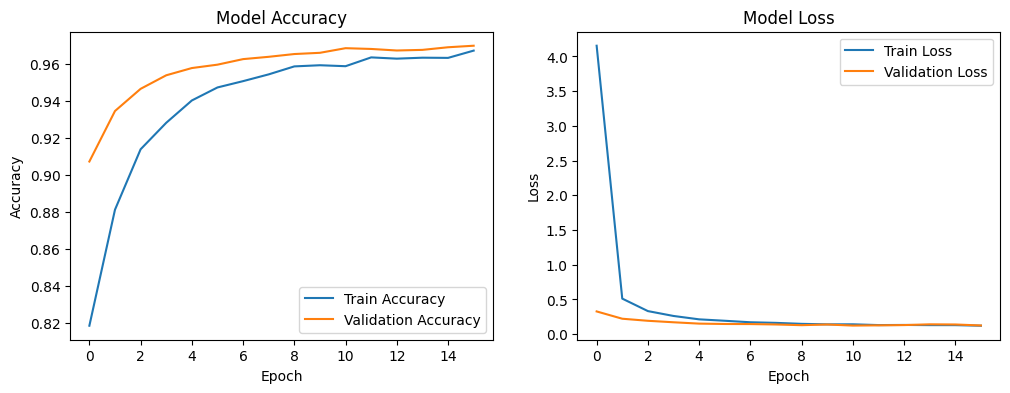

In [61]:
plt.figure(figsize=(12, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()